## Import Libaries & Data

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df = pd.read_csv('application_clean.csv')

## Train Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
RSEED = 101

In [66]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED, stratify=y)

In [67]:
df_train = pd.concat([y_train, X_train], axis=1)

In [68]:
from sklearn.utils import resample

df_0 = df_train[df_train.target==0]
df_1 = df_train[df_train.target==1]

df_0d2 = resample(df_0, replace=False, n_samples=50000, random_state=5)
df_1u2 = resample(df_1, replace=True, n_samples=50000, random_state=5)
df_b = pd.concat([df_0d2, df_1u2])

df_train = df_b.copy()

X_train = df_train.drop('target', axis=1)
y_train = df_train['target']

## Fill Missing Values

In [69]:
from sklearn.preprocessing import MinMaxScaler, Imputer

imputer = Imputer(strategy = 'median')

scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/geschew/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Decision Tree Model

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score

In [71]:
dtree = DecisionTreeClassifier(random_state=RSEED)

In [72]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [73]:
predictions = dtree.predict(X_test)

Text(0.5, 1.0, 'Confusion matrix for Decision Tree Classifier')

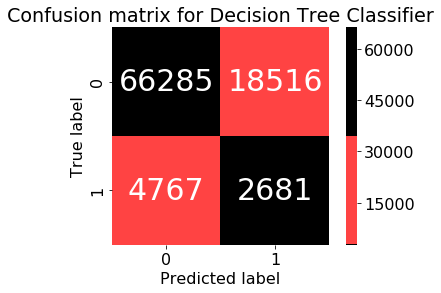

In [74]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, annot_kws={"size":30}, cmap=colors_r, center=3000, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Decision Tree Classifier')

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     84801
           1       0.13      0.36      0.19      7448

    accuracy                           0.75     92249
   macro avg       0.53      0.57      0.52     92249
weighted avg       0.87      0.75      0.80     92249



## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rnc = RandomForestClassifier(n_estimators=100, random_state=RSEED, n_jobs=-1, verbose=1)

In [78]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        Xtrain, Xtest = train_X.values[train_index], train_X.values[test_index]
        ytrain, ytest = train_y.values[train_index], train_y.values[test_index]
        clf.fit(Xtrain, ytrain)
        predictions = clf.predict(Xtest)
        accuracy = accuracy_score(ytest, predictions)
        outcomes.append(accuracy)
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [79]:
ytrain = y_train.copy()
Xtrain = X_train.copy()
ytrain.reset_index(drop=True, inplace=True)

kf = KFold(n_splits=3, random_state=2)
outcomes = []
for train_index, test_index in kf.split(Xtrain):
    train_X, test_X = Xtrain[train_index], Xtrain[test_index]
    train_y, test_y = ytrain[train_index], ytrain[test_index]
    rnc.fit(train_X, train_y)
    pred_y = rnc.predict(test_X)
    recall = recall_score(test_y, pred_y, pos_label=1)
    outcomes.append(recall)
mean_recall = np.mean(outcomes)
print("Mean Recall: {0}".format(mean_recall)) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
/Users/geschew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.

Mean Recall: 0.5201460900431288


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [80]:
rnc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=1,
                       warm_start=False)

In [81]:
pred = rnc.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished


Text(0.5, 1.0, 'Confusion matrix for Random Forest Classifier')

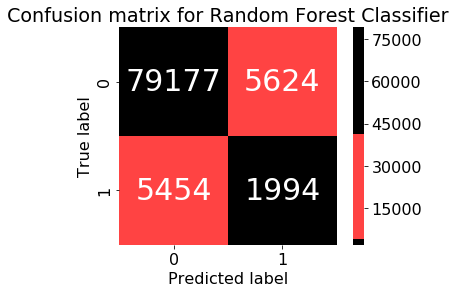

In [82]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, annot_kws={"size":30}, cmap=colors_r, center=4000, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Random Forest Classifier')

In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     84801
           1       0.26      0.27      0.26      7448

    accuracy                           0.88     92249
   macro avg       0.60      0.60      0.60     92249
weighted avg       0.88      0.88      0.88     92249



## Hyperparameter Tuning via Randomized Search

### Based on smaller sample

In [53]:
df_sample = df.sample(20000)

In [54]:
X_sample = df_sample.drop('target', axis=1)
y_sample = df_sample['target']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample, y_sample, test_size=0.25, random_state=RSEED, stratify=y_sample)

In [55]:
df_train_s = pd.concat([y_train_s, X_train_s], axis=1)

In [56]:
from sklearn.utils import resample

df_0_s = df_train_s[df_train_s.target==0]
df_1_s = df_train_s[df_train_s.target==1]

df_0d2_s = resample(df_0_s, replace=False, n_samples=10000, random_state=5)
df_1u2_s = resample(df_1_s, replace=True, n_samples=10000, random_state=5)
df_b_s = pd.concat([df_0d2_s, df_1u2_s])

df_train_s = df_b_s.copy()

X_train_s = df_train_s.drop('target', axis=1)
y_train_s = df_train_s['target']

In [57]:
imputer = Imputer(strategy = 'median')

scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(X_train_s)

X_train_s = imputer.transform(X_train_s)
X_test_s = imputer.transform(X_test_s)

scaler.fit(X_train_s)
X_train_s = scaler.transform(X_train_s)
X_test_s = scaler.transform(X_test_s)

/Users/geschew/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
param_grid = {
    'n_estimators': np.linspace(170, 190).astype(int),
    'max_depth': [None] + list(np.linspace(3, 6).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 0.7, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 20, 500).astype(int)),
    'min_samples_split': [5, 10],
    'bootstrap': [True, False]
}

estimator = RandomForestClassifier(random_state=RSEED)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)
 
rs.fit(X_train_s, y_train_s)

rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


{'n_estimators': 180,
 'min_samples_split': 10,
 'max_leaf_nodes': 17,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': False}

### Best Model

In [60]:
rnc_best = RandomForestClassifier(n_estimators=180, 
                                  min_samples_split=10, 
                                  max_leaf_nodes=17, 
                                  max_features='sqrt',
                                  max_depth=5,
                                  bootstrap=False,
                                  random_state=RSEED, 
                                  n_jobs=-1, 
                                  verbose=1)

In [61]:
rnc_best.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s


KeyboardInterrupt: 

In [ ]:
pred_best = rnc_best.predict(X_test)

In [ ]:
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)

colors = ['k', '#FF4343']
colors_r = ['#FF4343', 'k', '#FF4343', 'k']

plt.figure()
sns.heatmap(confusion_matrix(y_test, pred_best), annot=True, annot_kws={"size":30}, cmap=colors_r, center=21100, square=True, fmt='.0f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Random Forest Classifier')

In [ ]:
print(classification_report(y_test, pred_best))

## Feature Importance

In [ ]:
X = pd.DataFrame(X)
cols = list(df.columns.values)
cols.remove('target')
X.columns = cols

In [ ]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X.columns.values[indices[:7]]
    values = importances[indices][:7]

    # Creat the plot
    fig = plt.figure(figsize = (15,8))
    plt.title("Normalized Weights for First Ten Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(7), values, width = 0.5, align="center", color = '#FF4343', \
          label = "Feature Weight")
    plt.bar(np.arange(7) - 0.3, np.cumsum(values), width = 0.5, align = "center", color = 'k', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=70)
    plt.xlim((-0.5, 6.5))
    plt.ylabel("Weight", fontsize = 16)
    plt.xlabel("Feature", fontsize = 16)
    
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('font', size=16)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

In [ ]:
# TODO: Train the supervised model on the training set 
model = RandomForestClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)